[  0   0  -1 ..., 221 150  94]


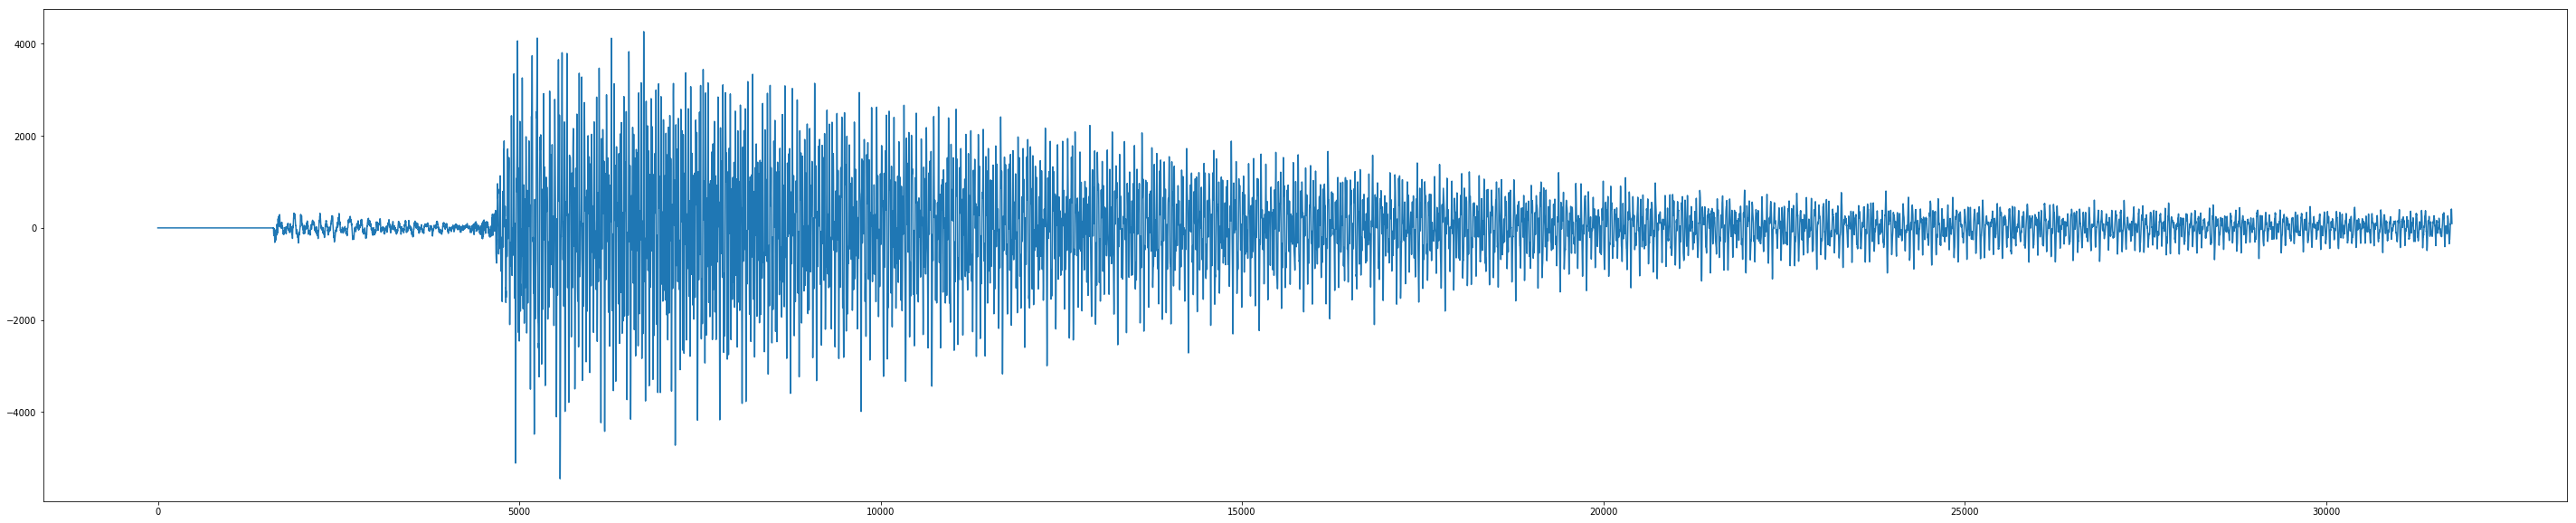

In [145]:
import pyaudio
import numpy as np
from matplotlib import pyplot as plt
import matplotlib as mpl

from IPython.display import (
    Audio, display, clear_output)
from ipywidgets import widgets
from functools import partial
%matplotlib inline
import random
from scipy.signal import square

CHUNKSIZE = 1024 # fixed chunk size
RECORD_SECONDS = 2
RATE=16000

# initialize portaudio
p = pyaudio.PyAudio()
stream = p.open(format=pyaudio.paInt16, channels=1, rate=RATE, input=True, frames_per_buffer=CHUNKSIZE)

frames = [] # A python-list of chunks(numpy.ndarray)
for _ in range(0, int(RATE / CHUNKSIZE * RECORD_SECONDS)):
    data = stream.read(CHUNKSIZE)
    frames.append(np.fromstring(data, dtype=np.int16))

#Convert the list of numpy-arrays into a 1D array (column-wise)
numpydata = np.hstack(frames)
print(numpydata)

# close stream
stream.stop_stream()
stream.close()
p.terminate()

# plot data
mpl.rcParams['figure.figsize'] = (50,10)
plt.plot(numpydata)
plt.show()

#
display(Audio(numpydata, rate=RATE, autoplay=True))

In [173]:
t = [i/len(numpydata)*RECORD_SECONDS for i in range(len(numpydata))]
from scipy.fftpack import fftfreq
fs = fftfreq(len(t))*RATE

def unique(values, tol):
    new = []
    for i in range(len(values)):
        v = values[i]
        add = True
        for vn in new:
            if np.abs(vn - v) <= tol:
                add = False
                break
        if add:
            new.append(v)
    return new

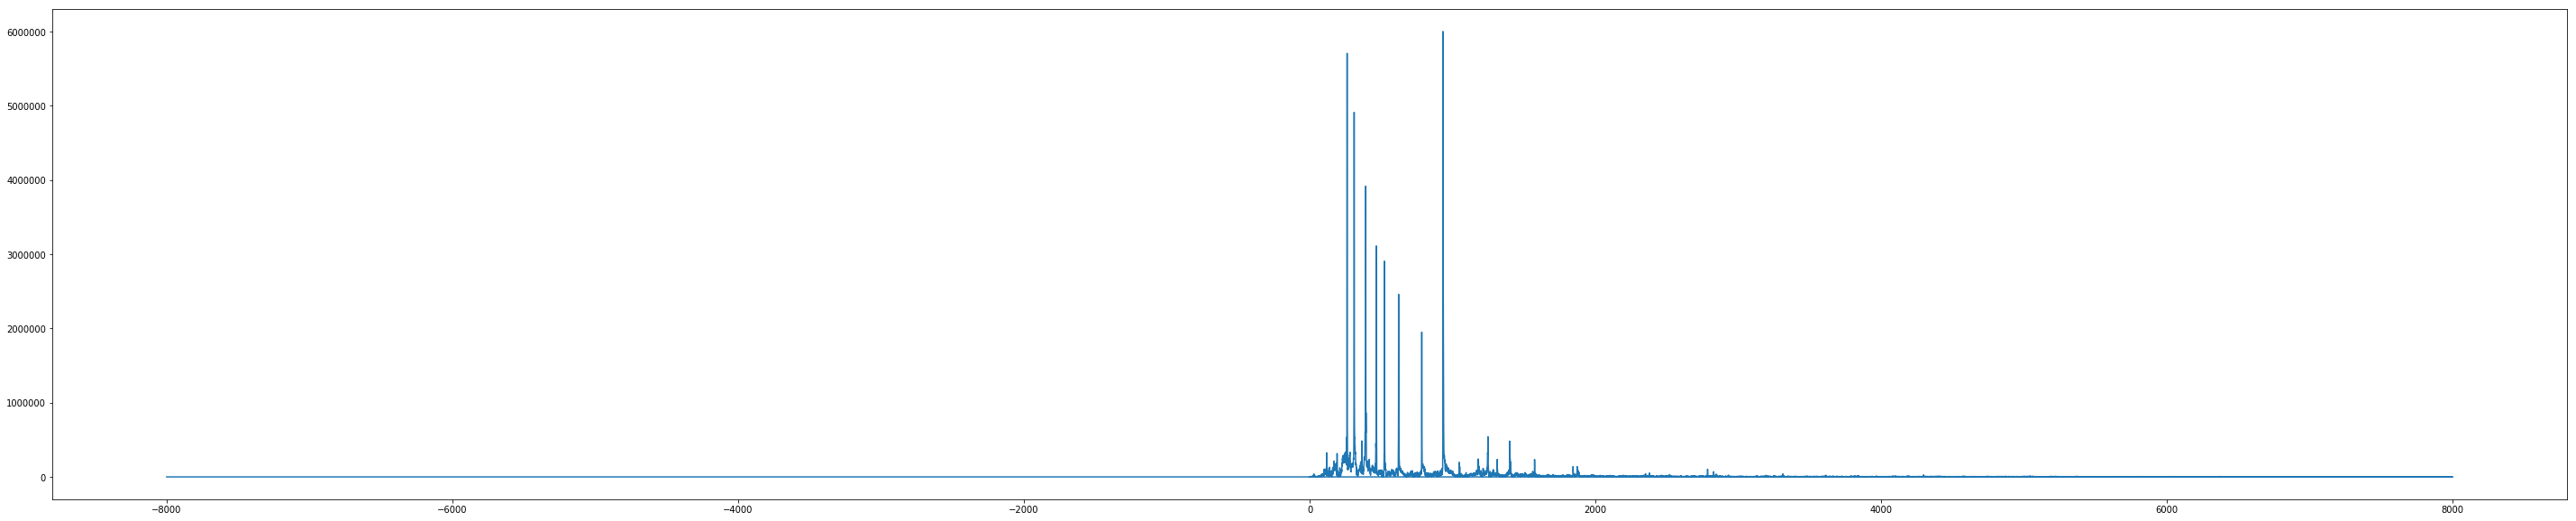

Fréquences =  [  932.96370968   261.59274194   261.08870968   310.98790323   932.45967742
   933.46774194   392.13709677   466.22983871   933.97177419   522.68145161
   466.73387097   311.49193548   523.18548387   934.47580645   621.97580645
   260.58467742   934.97983871   310.48387097   784.27419355   935.48387097
   391.63306452   935.98790323   262.09677419   311.99596774   931.95564516
   465.72580645   391.12903226   936.49193548   467.23790323   312.5
   309.97983871   621.47177419   390.625        523.68951613   622.47983871
   936.99596774   783.77016129   313.00403226   393.64919355   465.22177419
   392.64112903   394.15322581   784.77822581   309.47580645   390.12096774
   262.60080645   394.65725806   622.98387097   313.50806452   522.17741935
   308.97177419   467.74193548   937.5          395.16129032   388.10483871
   389.61693548   931.4516129    393.14516129   464.71774194   785.28225806
   260.08064516   387.60080645   620.96774194   314.01209677   524.19354839
  124

In [183]:
fft = np.abs(np.fft.fft(numpydata))

fs = fs[:int(len(fft)/2)+1]
fft = fft[:int(len(fft)/2)+1]

plt.plot(fs, fft)
plt.show()

indices = np.argsort(fft)[::-1]

freqs = fs[indices]

print('Fréquences = ', freqs[:10])